<a href="https://colab.research.google.com/github/MAHABUB51/MiningApplicationsMLDL/blob/main/compressive_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exploratory data analysis (EDA)
# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Load the Dataset

In [ ]:
data = pd.read_csv('/content/UCS PREDICTION DATABASE/Copy of Concrete_Data.csv')
# Display the first few rows to inspect the structure
print(data.head())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

#Check Data Types and Missing Values
#Inspect the dataset’s structure and clean any missing or anomalous data:

In [ ]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
#summary statistics to understand distributions
print(data.describe())

       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.167864   
std                                   104.506364   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895825       
std                                            86.279342       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                

#Visualize Feature Distributions

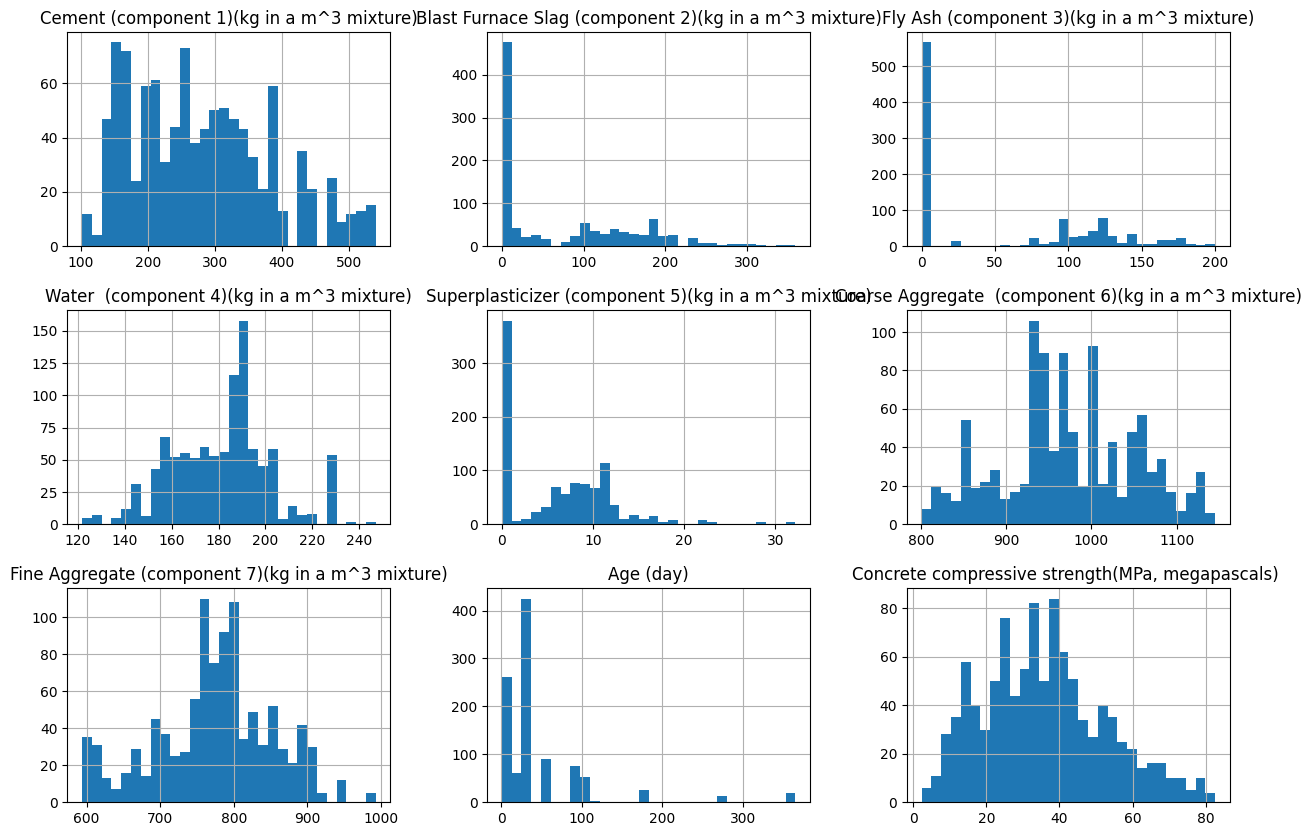

In [ ]:
# Plot histograms
data.hist(bins=30, figsize=(15, 10))
plt.show()

#Correlation Analysis
#relationships between features and the target variable:

In [ ]:
# Compute and visualize correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Scatter Plots for Key Features
#Find out the trends between individual features and the target:

In [ ]:
print(data.columns)  #Inspect Column Names

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [ ]:
data.columns = data.columns.str.strip() # Check for Extra Spaces:

In [ ]:
data.rename(columns={
    'Concrete compressive strength(MPa, megapascals)': 'Compressive_Strength'
}, inplace=True) # Rename Columns

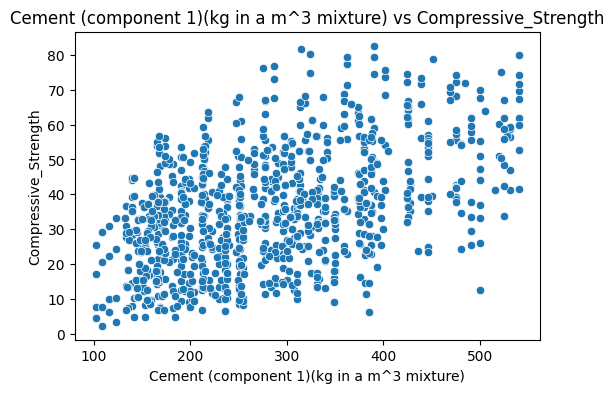

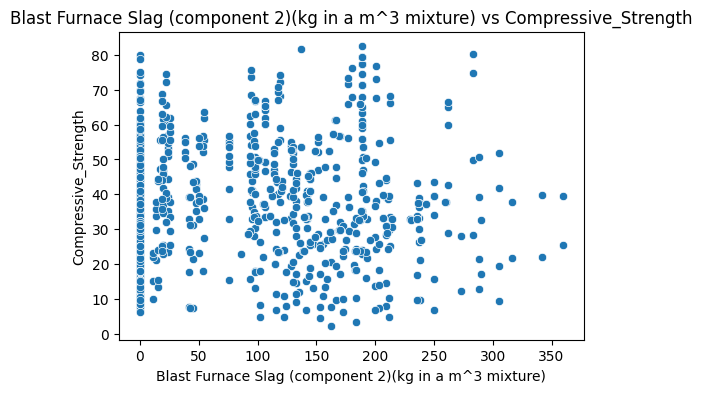

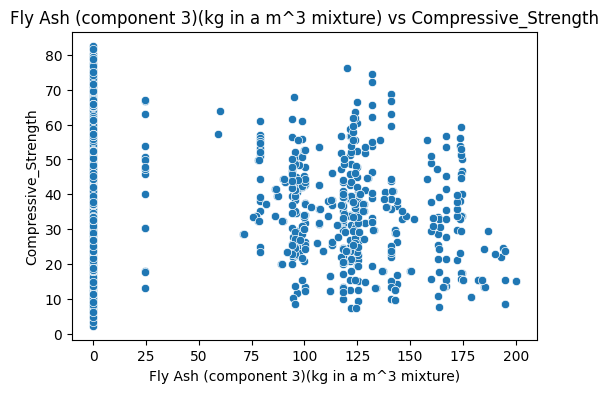

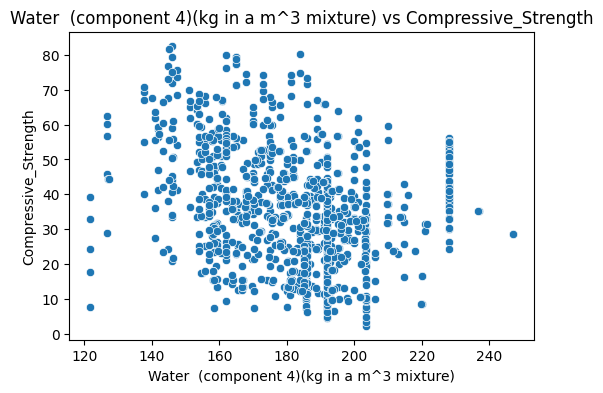

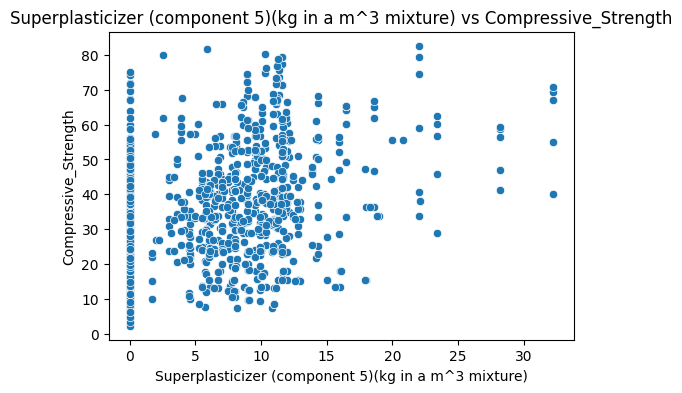

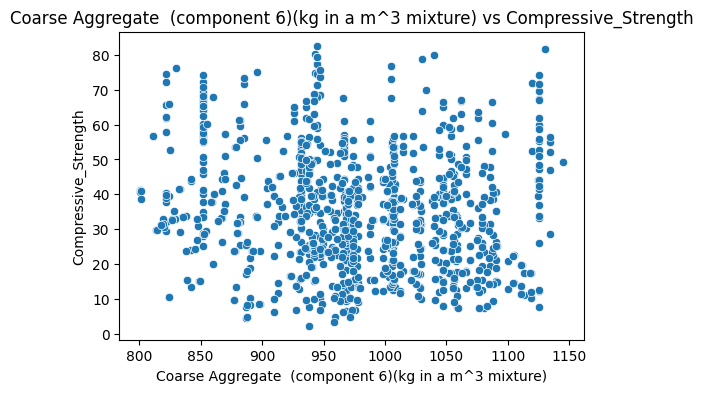

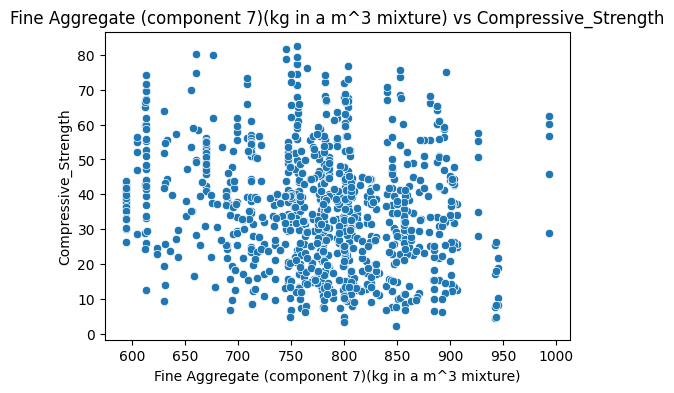

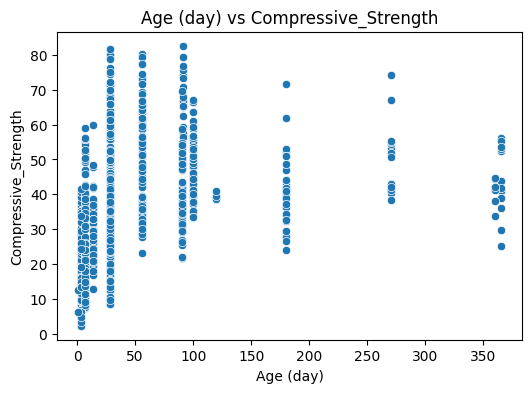

In [ ]:
target = 'Compressive_Strength'  # Use the simplified name after renaming

for col in data.columns:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[col], y=data[target])
        plt.title(f'{col} vs {target}')
        plt.show()

#Handle Potential Non-Numeric Columns:
# If there are non-numeric columns, exclude them before plotting

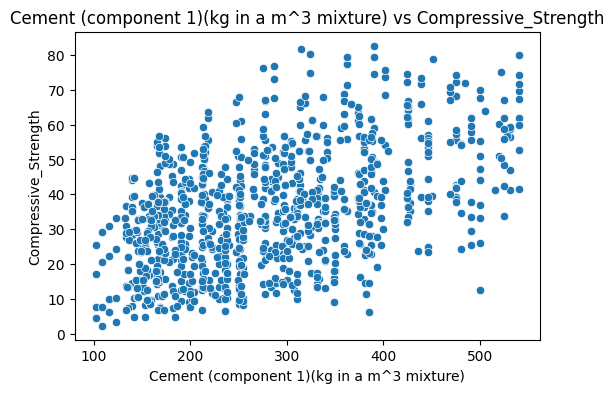

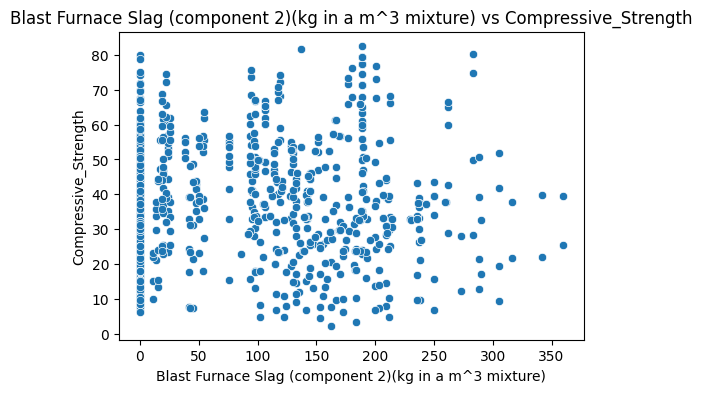

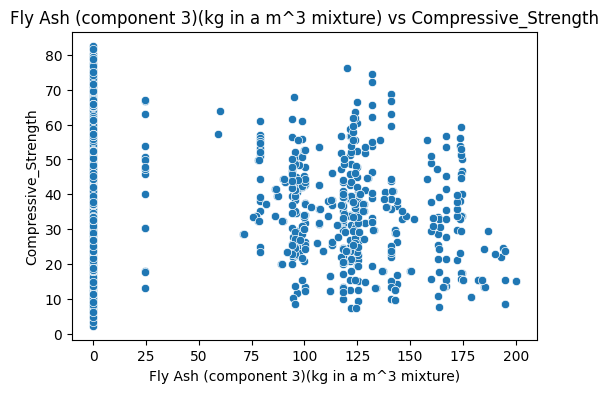

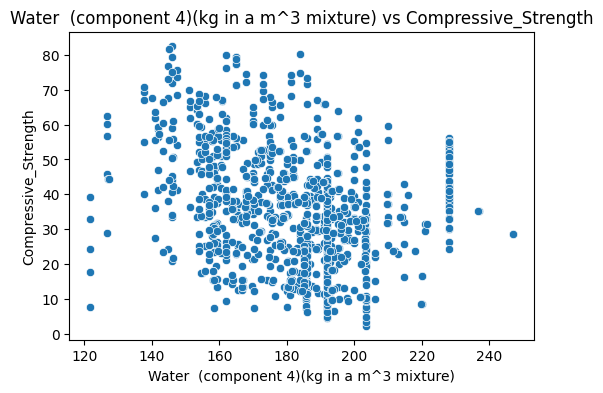

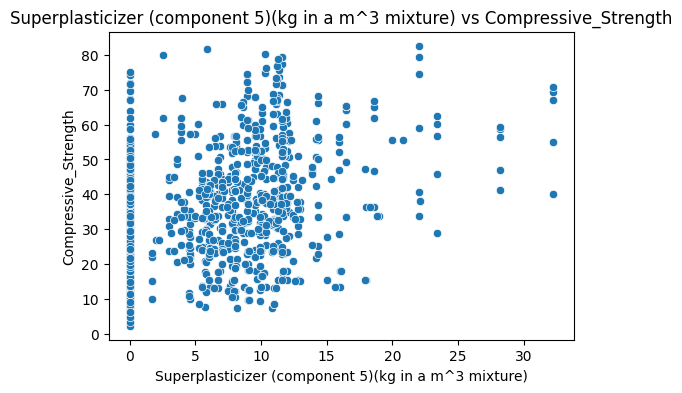

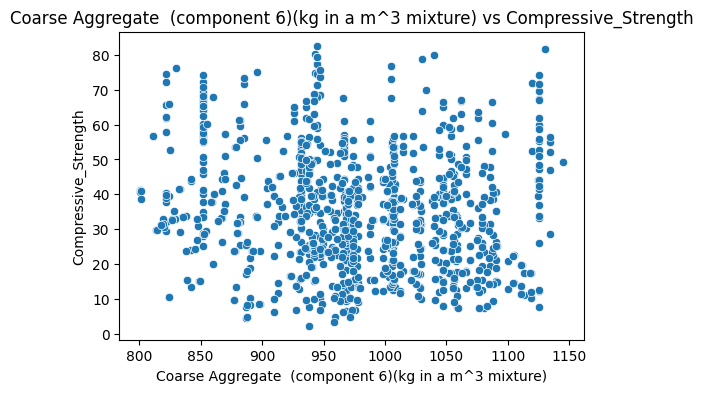

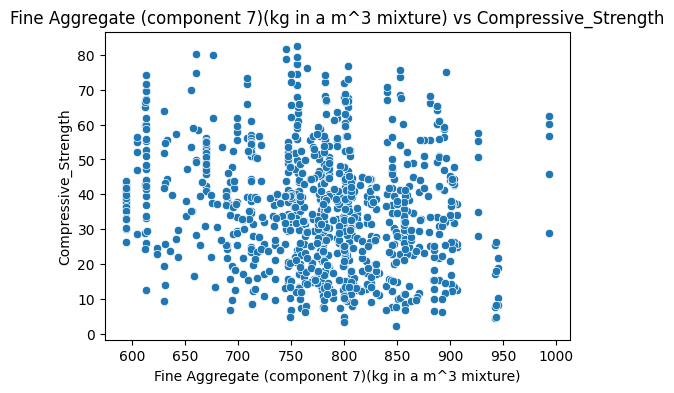

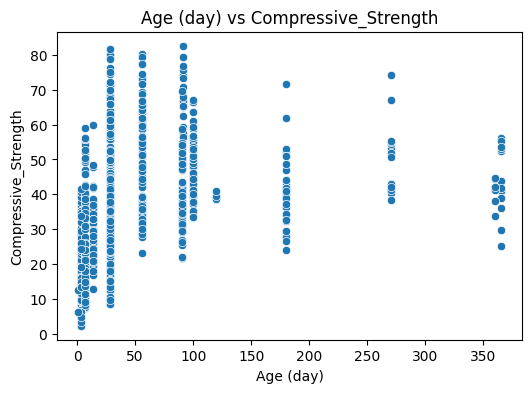

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[col], y=data[target])
        plt.title(f'{col} vs {target}')
        plt.show()

#Now, i am going to do Modeling Phase
#Split the dataset into training and testing sets:
80% for training
20% for testing

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['Compressive_Strength'])  # Replace with actual target column
y = data['Compressive_Strength']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (824, 8)
Testing set size: (206, 8)


#Preprocess the Data
#Preprocessing ensures data compatibility with the model:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data; only transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Choose and Train Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
# Train models and store results
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

Training Linear Regression...
Training Random Forest...
Training XGBoost...


#Evaluate Models
#Evaluate each model’s performance on the test set:
Metrics: RMSE, MAE, R² Score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate models
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    print(f"Performance of {name}:")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"  R² Score: {r2_score(y_test, y_pred)}\n")

Performance of Linear Regression:
  RMSE: 9.79647590162436
  MAE: 7.745559243921434
  R² Score: 0.627553179231485

Performance of Random Forest:
  RMSE: 5.463242192302882
  MAE: 3.734132387309294
  R² Score: 0.8841688335094583

Performance of XGBoost:
  RMSE: 4.606305197630194
  MAE: 2.996374957538346
  R² Score: 0.9176563827108167



#Optimize the Best Model
#Based on the evaluation, pick the best-performing model and optimize it with hyperparameter tuning. Example with Random Forest:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Perform grid search
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


#Feature Importance (For Tree-Based Models)

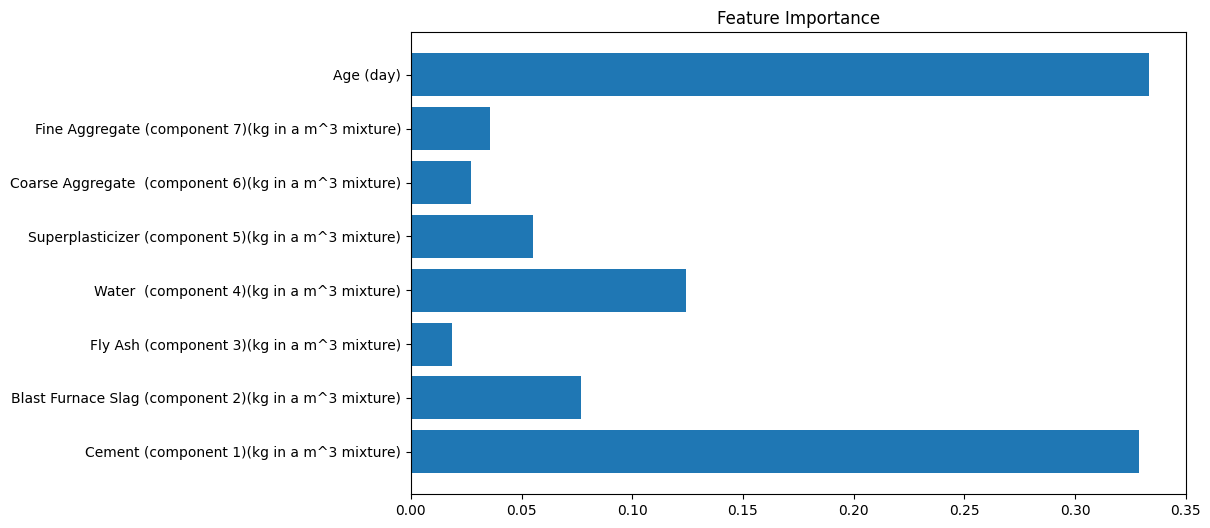

In [ ]:
import matplotlib.pyplot as plt

# Feature importance for Random Forest
importances = best_model.feature_importances_
features = data.drop(columns=['Compressive_Strength']).columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

#Save the Model

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'best_concrete_model.pkl')

# Load the model
loaded_model = joblib.load('best_concrete_model.pkl')